**Snapshots**: https://www.tng-project.org/data/downloads/TNG300-1/

In [1]:
import numpy as np 

import pickle

import pandas as pd


import multicam

from tqdm import tqdm


In [2]:
import matplotlib.pyplot as plt


In [19]:
trees_file = "../../../data/processed/tng/TNG300-1_cut_trees.p"
tng_snapshot_dir = "../../../data/processed/tng/TNG300-1/"  # everything is a host halo
present_snapfile = tng_snapshot_dir + "TNG300-1_HaloHistory_MBP_snap99.hdf5"


In [20]:
SNAPS = np.arange(0, 100, 1)


In [21]:
TNG_H = 0.6774


In [22]:
def _convert_tng_mass(gmass):
    # robust to 0 mass
    return np.where(gmass > 0, np.log10(gmass * 1e10 / TNG_H), 0)


In [23]:
def _reverse_trees(trees):
    """Reverse each entry in trees so that order is from early to late times."""
    for tree in trees:
        for key in tree.keys():
            if key not in ["Number", "ChunkNumber", "TreeID"]:
                tree[key] = tree[key][::-1]
    return trees


In [24]:
def _read_trees(trees_file:str):
    """Read in the trees file and convert masses to log10(M/Msun)."""
    with open(trees_file, 'rb') as pickle_file:
        _trees = pickle.load(pickle_file)
        trees = _reverse_trees(_trees)
        for tree in trees:
            for k in tree.keys():
                if "Mass" in k or "_M_" in k: 
                    tree[k] = _convert_tng_mass(tree[k])
    return trees


## Sanity check one MAH

In [25]:
trees = _read_trees(trees_file)
cat = pd.read_hdf(present_snapfile)


/var/folders/yl/5w7yl6bn1tsc5fjrdtsrsjhh0000gn/T/ipykernel_86792/4270742319.py:3: RuntimeWarning: divide by zero encountered in log10
  return np.where(gmass > 0, np.log10(gmass * 1e10 / TNG_H), 0)


In [26]:
# Lets pick a halo in the mass complete sample (mvir > 12.7 ~ Group_M_TopHat200)

# pick tress that have present day snap
trees1 = [t for t in trees if 99 in t['SnapNum']]

# now pick trees that have Group_M_TopHat200 > 12.8 (some margin)
gmass1 = np.array([t['Group_M_TopHat200'][-1] for t in trees1])
trees2 = [t for ii, t in enumerate(trees1) if gmass1[ii] > 12.8]
len(trees2), len(trees1)


(6567, 12522)

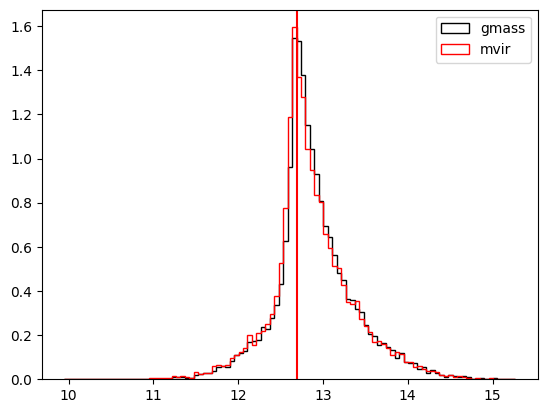

In [27]:
_, bins, _ = plt.hist(gmass1, bins=101, histtype='step', color='k', density=True, label='gmass');
_ = plt.hist(cat['Mvir'].values, bins=bins, histtype='step', color='r', density=True, label='mvir');
plt.axvline(12.7, c='r')
plt.legend()


In [28]:
# lets pick one of these trees
t_idx = 0
t = trees2[t_idx]
# t


In [29]:
t['Group_M_TopHat200'].shape


(99,)

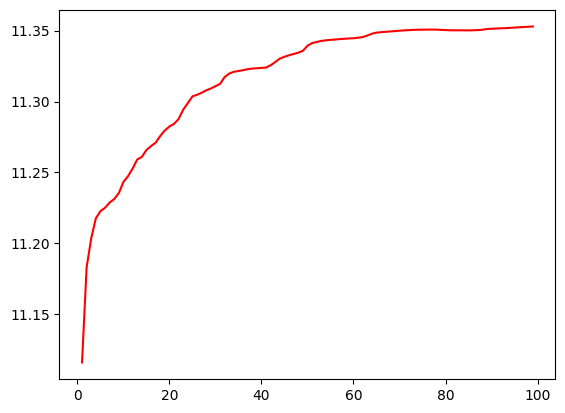

In [30]:
#let's plot gmass of this tree over time 
snaps_t = t['SnapNum']
gmass_t = _convert_tng_mass(t['Group_M_TopHat200'])
plt.plot(snaps_t, gmass_t, '-', c='r')
